# Análise exploratória dos dados (EDA)

O diabetes é uma condição crônica grave que compromete a capacidade do organismo de regular os níveis de glicose no sangue de forma eficaz, o que pode resultar em uma diminuição da qualidade de vida e da expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa de saúde conduzida anualmente por telefone pelo Centro de Controle e Prevenção de Doenças dos Estados Unidos (CDC). Esse levantamento coleta informações de milhares de americanos sobre comportamentos de risco à saúde, condições crônicas e o uso de serviços preventivos.

Neste projeto, foi utilizado o conjunto de dados do BRFSS referente ao ano de 2015, disponível no

Kaggle: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## Dicionário de variáveis:

- `Diabetes`: 0 = sem diabetes, 1 = com diabetes
- `Pressao_Alta`: 0 = sem pressão alta, 1 = com pressão alta
- `Colesterol_Alto`: 0 = sem colesterol alto, 1 = com colesterol alto
- `Colesterol_Exame`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `IMC`: Índice de Massa Corporal (IMC)
- `Fumante`: 0 = não fumante, 1 = fumante
- `AVC`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `Problema_Cardiaco`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `Atividade_Fisica`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Come_Frutas`: 0 = não consome frutas, 1 = consome frutas
- `Come_Legumes`: 0 = não consome vegetais, 1 = consome vegetais
- `Consumo_Bebida_Alcoolica`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `Plano_Saude`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `Sem_Dinheiro_Consultas`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `Saude_Geral`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `Dias_Problemas_Mentais`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `Dias_Problemas_Fisicos`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `Dificuldade_Andar`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Genero`: 0 = feminino, 1 = masculino
- `Faixa_Idade`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Ensino`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Faixa_Renda`: Renda anual em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

In [1]:
# Importando a bibliotecas usadas no projeto 
import matplotlib.pyplot as plt
# Importando a função PercentFormatter do Matplotlib para formatar o eixo Y em porcentagem
from matplotlib.ticker import PercentFormatter

import numpy as np  
import pandas as pd
import seaborn as sns

# Importando o arquivo de configuração 
from src.config import DADOS_TRATADOS, PASTA_IMAGENS

df_diabetes_tratado = pd.read_parquet(DADOS_TRATADOS)

df_diabetes_tratado.head()

,Diabetes,Pressao_Alta,Colesterol_Alto,Colesterol_Exame,IMC,Fumante,AVC,Problema_Cardiaco,Atividade_Fisica,Come_Frutas,...,Plano_Saude,Sem_Dinheiro_Consultas,Saude_Geral,Dias_Problemas_Mentais,Dias_Problemas_Fisicos,Dificuldade_Andar,Genero,Faixa_Idade,Ensino,Faixa_Renda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Masculino,35-39,Faculdade +,$75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Masculino,75-79,Faculdade +,$75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Masculino,80+,Faculdade +,$75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Masculino,70-74,Faculdade +,$75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito boa,0,0,Não,Feminino,55-59,Faculdade inc. ou Técnico,$75.000+


In [2]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Diabetes                  70692 non-null  category
 1   Pressao_Alta              70692 non-null  category
 2   Colesterol_Alto           70692 non-null  category
 3   Colesterol_Exame          70692 non-null  category
 4   IMC                       70692 non-null  int8    
 5   Fumante                   70692 non-null  category
 6   AVC                       70692 non-null  category
 7   Problema_Cardiaco         70692 non-null  category
 8   Atividade_Fisica          70692 non-null  category
 9   Come_Frutas               70692 non-null  category
 10  Come_Legumes              70692 non-null  category
 11  Consumo_Bebida_Alcoolica  70692 non-null  category
 12  Plano_Saude               70692 non-null  category
 13  Sem_Dinheiro_Consultas    70692 non-null  cate

In [3]:
# Criando Listas para cada tipo de coluna do dataframe

# Criando uma lista somente com colunas numéricas 
colunas_numericas = df_diabetes_tratado.select_dtypes(include="number").columns.tolist()

# Coluna Alvo (contém a variável que se deseja analisar) 
coluna_alvo = "Diabetes"

# Criando uma lista com as colunas do tipo categóricas (category)
colunas_categoricas = df_diabetes_tratado.select_dtypes(include="category").columns.tolist()
colunas_categoricas.remove(coluna_alvo)

# Criando uma lista com as colunas binárias 
colunas_binarias = df_diabetes_tratado.nunique()[df_diabetes_tratado.nunique() == 2].index.tolist()
colunas_binarias.remove(coluna_alvo)

# Crinado uma lista com as colunas não binárias 
colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

In [4]:
colunas_numericas

['IMC', 'Dias_Problemas_Mentais', 'Dias_Problemas_Fisicos']

In [5]:
coluna_alvo

'Diabetes'

In [6]:
colunas_categoricas

['Pressao_Alta',
 'Colesterol_Alto',
 'Colesterol_Exame',
 'Fumante',
 'AVC',
 'Problema_Cardiaco',
 'Atividade_Fisica',
 'Come_Frutas',
 'Come_Legumes',
 'Consumo_Bebida_Alcoolica',
 'Plano_Saude',
 'Sem_Dinheiro_Consultas',
 'Saude_Geral',
 'Dificuldade_Andar',
 'Genero',
 'Faixa_Idade',
 'Ensino',
 'Faixa_Renda']

In [7]:
colunas_binarias

['Pressao_Alta',
 'Colesterol_Alto',
 'Colesterol_Exame',
 'Fumante',
 'AVC',
 'Problema_Cardiaco',
 'Atividade_Fisica',
 'Come_Frutas',
 'Come_Legumes',
 'Consumo_Bebida_Alcoolica',
 'Plano_Saude',
 'Sem_Dinheiro_Consultas',
 'Dificuldade_Andar',
 'Genero']

In [8]:
colunas_nao_binarias

['Faixa_Renda', 'Saude_Geral', 'Faixa_Idade', 'Ensino']

## Variáveis numéricas

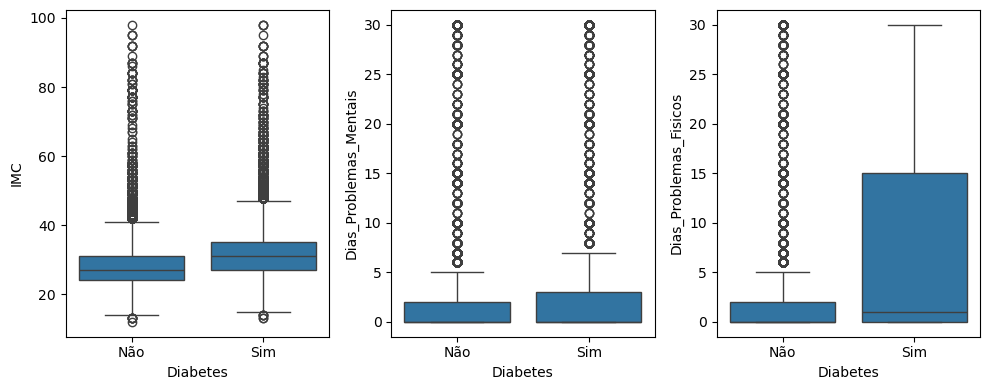

In [9]:
# Criando visualizações de dados.

# Definindo o sistema de eixo e tamanho da figura 
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Criando boxplot de todas as colunas numéricas do dataframe em relação a coluna alvo (Diabetes)
for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_tratado, x=coluna_alvo, y=coluna, ax=ax)

plt.tight_layout()
plt.show()

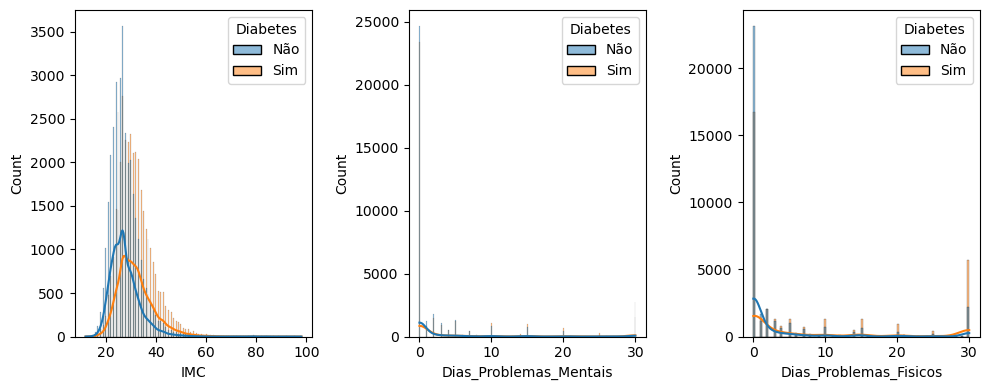

In [10]:
# Definindo o sistema de eixo e tamanho da figura
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Criando histogramas das colunas numéricas do dataframe
for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_tratado, x=coluna, hue=coluna_alvo, kde=True, ax=ax)

plt.tight_layout()
plt.show()


##### Podemos considerar que existe diferença no IMC entre diabéticos e não diabéticos?

Ao analisar o IMC, observa-se um deslocamento para a direita na curva KDE das pessoas com diabetes, o que sugere uma possível relação entre o excesso de peso e a incidência da doença.


In [11]:
# Agrupando a coluna alvo e as colunas munéricas para fazer um resumo estatístico 
df_diabetes_tratado.groupby(coluna_alvo, observed=False).describe().T

Diabetes                               Não           Sim
IMC                    count  35346.000000  35346.000000
                       mean      27.769960     31.944011
                       std        6.187636      7.363401
                       min       12.000000     13.000000
                       25%       24.000000     27.000000
                       50%       27.000000     31.000000
                       75%       31.000000     35.000000
                       max       98.000000     98.000000
Dias_Problemas_Mentais count  35346.000000  35346.000000
                       mean       3.042268      4.461806
                       std        7.208408      8.947717
                       min        0.000000      0.000000
                       25%        0.000000      0.000000
                       50%        0.000000      0.000000
                       75%        2.000000      3.000000
                       max       30.000000     30.000000
Dias_Problemas_Fisicos count  35346.000000  35346.000000
                       mean       3.666355      7.954479
                       std        8.098339     11.301491
                       min        0.000000      0.000000
                       25%        0.000000      0.000000
                       50%        0.000000      1.000000
                       75%        2.000000     15.000000
                       max       30.000000     30.000000

- Observando o boxplot e o histograma do IMC em relação à coluna alvo (diabetes) e analisando os dados estatísticos, percebe-se que há uma tendência de pessoas com diabetes apresentarem índices mais altos de IMC.
- Ainda há uma sobreposição significativa das curvas em faixas de IMC entre 20 e 30, indicando que nem todas as pessoas com IMC elevado possuem diabetes e nem todas as pessoas com diabetes têm um IMC muito alto. Isso sugere que o IMC, apesar de ser um fator de risco, não é o único determinante para a presença da doença.

In [12]:
# Fazendo um estudo de correlação entre as colunas numéricas 
df_diabetes_tratado.corr(numeric_only=True)

,IMC,Dias_Problemas_Mentais,Dias_Problemas_Fisicos
IMC,1.000000,0.104682,0.161862
Dias_Problemas_Mentais,0.104682,1.000000,0.380272
Dias_Problemas_Fisicos,0.161862,0.380272,1.000000


### Variáveis categóricas

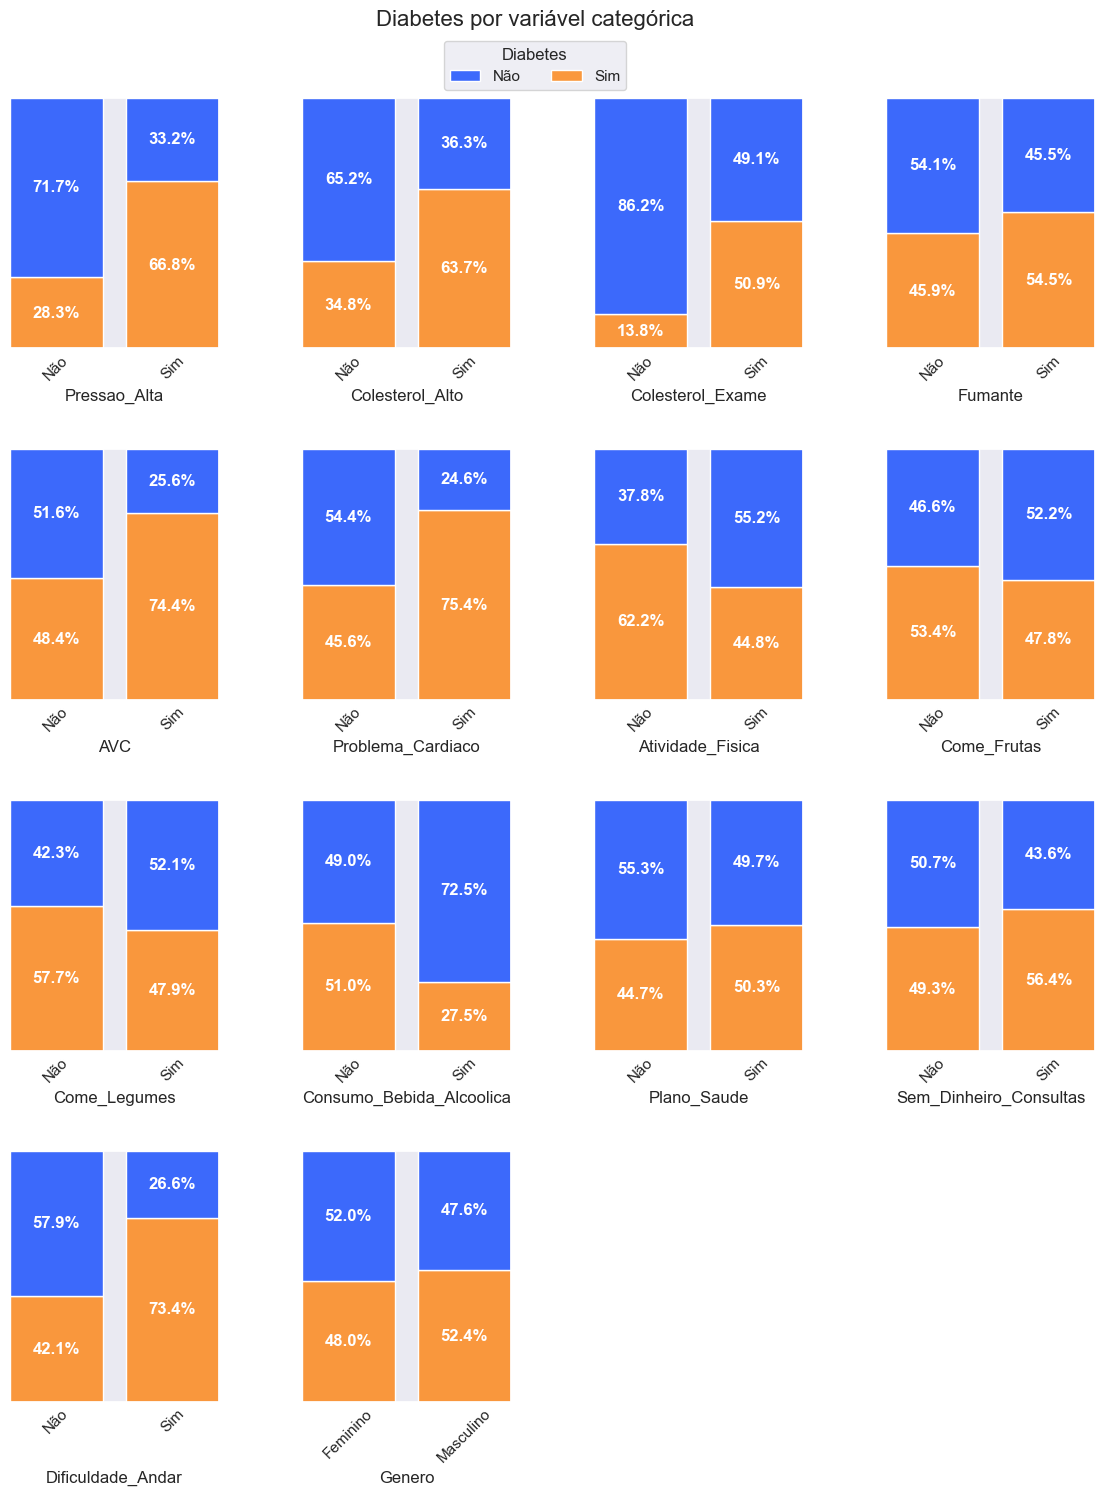

In [13]:
# Definindo o tema do Seaborn para os gráficos
sns.set_theme(style='dark', palette='bright', context='notebook')

# Criando uma figura com múltiplos subgráficos (4 linhas e 4 colunas)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 16), sharey=True)

# Loop para criar um histograma para cada coluna categórica binária
for i, coluna in enumerate(colunas_binarias):
    
    # Criando o histograma com distribuição de porcentagem
    h = sns.histplot(
            x=coluna,  # Definindo a variável no eixo X
            hue=coluna_alvo,  # Definindo a variável para diferenciar as categorias
            data=df_diabetes_tratado,  # DataFrame contendo os dados
            multiple='fill',  # Normaliza para que a soma seja 100% em cada categoria
            ax=axs.flat[i],  # Define o eixo correspondente
            stat='percent',  # Exibe as contagens como percentual
            shrink=0.8  # Reduz a largura das barras para melhor visualização
    )
    
    # Rotacionando os rótulos do eixo X e removendo as marcas de eixo
    h.tick_params(axis='x', labelrotation=45, length=0)

    # Formatando o eixo Y para exibir valores em porcentagem
    h.yaxis.set_major_formatter(PercentFormatter(1))

    # Removendo o nome do eixo Y para deixar o gráfico mais limpo
    h.set_ylabel('')
    
    # Adicionando rótulos de percentual dentro das barras
    for bar in h.containers:
        h.bar_label(
            bar, 
            label_type='center', 
            labels=[f'{b.get_height():.1%}' for b in bar],  # Convertendo valores para formato percentual
            color='white', 
            weight='bold'
        )

    # Removendo a legenda do gráfico individual para usar uma legenda única na figura
    legend = h.get_legend()
    legend.remove()

# Capturando os rótulos da legenda para serem usados na legenda geral
labels = [text.get_text() for text in legend.get_texts()]

# Criando uma legenda geral para a figura
fig.legend(
    handles=legend.legend_handles, 
    labels=labels, 
    loc='upper center',  # Posição da legenda no topo
    ncols=2,  # Número de colunas da legenda
    title='Diabetes',  # Título da legenda
    bbox_to_anchor=(0.5, 0.965)  # Ajustando a posição da legenda
)

# Adicionando um título geral para a figura
fig.suptitle('Diabetes por variável categórica', fontsize=16)

# Alinhando os rótulos dos eixos para melhorar a organização dos gráficos
fig.align_labels()

# Removendo os eixos não utilizados, caso a quantidade de colunas binárias seja menor que 16
for j in range(len(colunas_binarias), len(axs.flat)):
    fig.delaxes(axs.flat[j])

# Ajustando o espaçamento entre os gráficos
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

# Removendo rótulos do eixo Y de toda a figura
plt.yticks([])

# Removendo as marcas do eixo X
plt.tick_params(axis='x', length=0)

# Alterando o tamanho antes de salvar
#fig.set_size_inches(11, 12)  # Define um tamanho menor para salvar a imagem

# Salvando a imagem com tamanho reduzido
#fig.savefig(PASTA_IMAGENS / "diabetes_visualizacao_binarias.png", dpi=100)

# Exibindo a figura
plt.show()


In [14]:
colunas_nao_binarias

['Faixa_Renda', 'Saude_Geral', 'Faixa_Idade', 'Ensino']

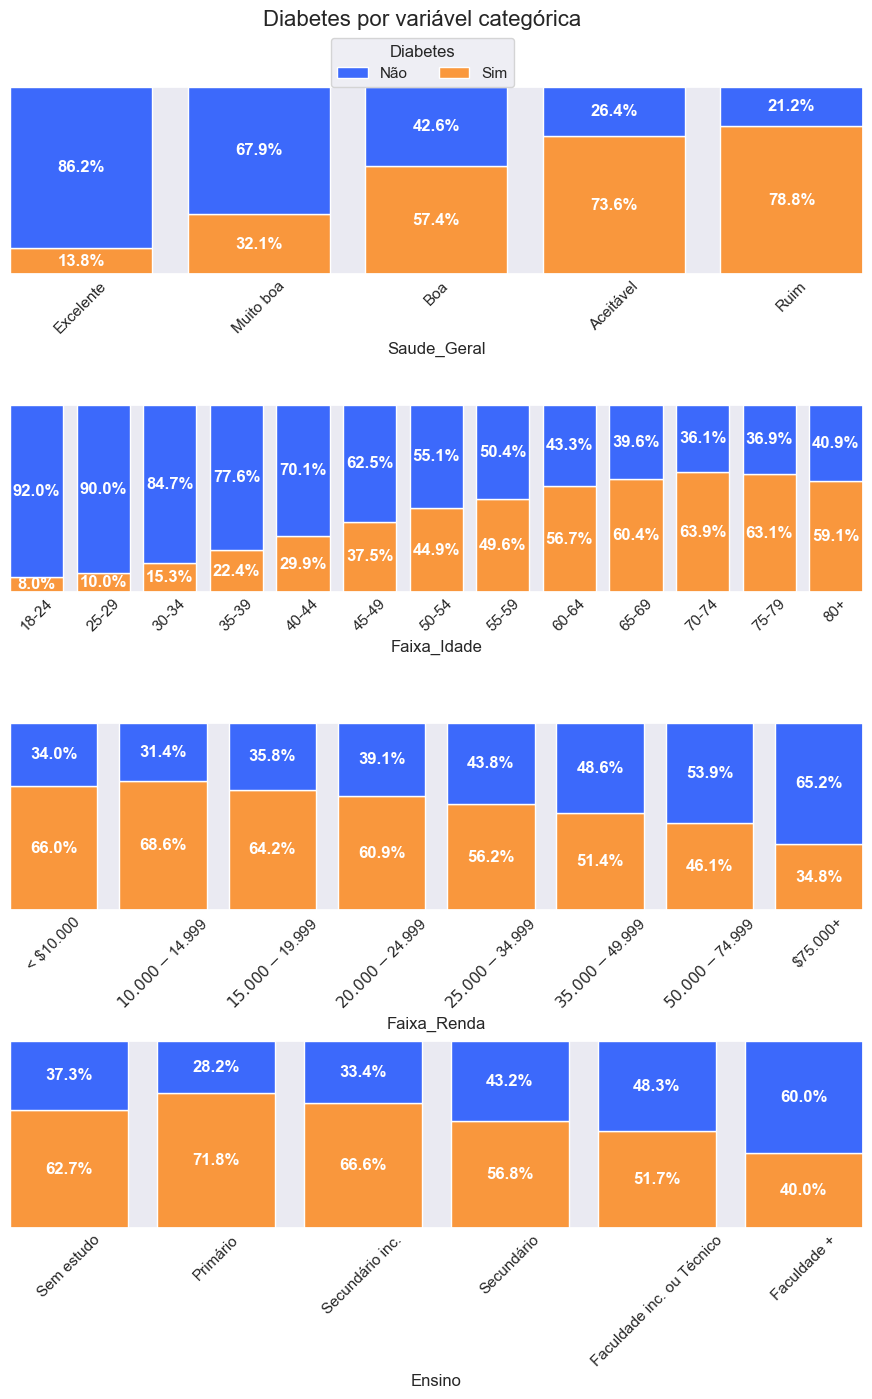

In [22]:
# Crinando visualizações para análise das colunas categóricas com mais de duas categorias 
# Obs.: Como a estrutura é basicamente a mesma, não comentarei o código detalhadamente como feito anteriormente.

colunas_nao_binarias = ['Saude_Geral', 'Faixa_Idade', 'Faixa_Renda', 'Ensino']

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

for i, coluna in enumerate(colunas_nao_binarias):
    h = sns.histplot(
            x=coluna,
            hue=coluna_alvo,
            data=df_diabetes_tratado,
            multiple='fill',
            ax=axs.flat[i],
            stat='percent',
            shrink=0.8
    )
                    
    h.tick_params(axis='x', labelrotation=45, length=0)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_yticks([])
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(
            bar,
            label_type='center', 
            labels=[f'{b.get_height():.1%}' for b in bar],
            color='white',
            weight='bold'
        )

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    handles=legend.legend_handles, 
    labels=labels, loc='upper center', 
    ncols=2, 
    title='Diabetes', 
    bbox_to_anchor=(0.5, 0.965)
)

fig.suptitle('Diabetes por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.1, hspace=0.7, top=0.925)
plt.yticks([])
plt.tick_params(axis='x', length=0)

# Alterando o tamanho antes de salvar
fig.set_size_inches(11, 14)  # Define um tamanho menor para salvar a imagem

# Salvando a imagem com tamanho reduzido
fig.savefig(PASTA_IMAGENS / "diabetes_visualizacao_categoricas.png", dpi=100)

plt.show()

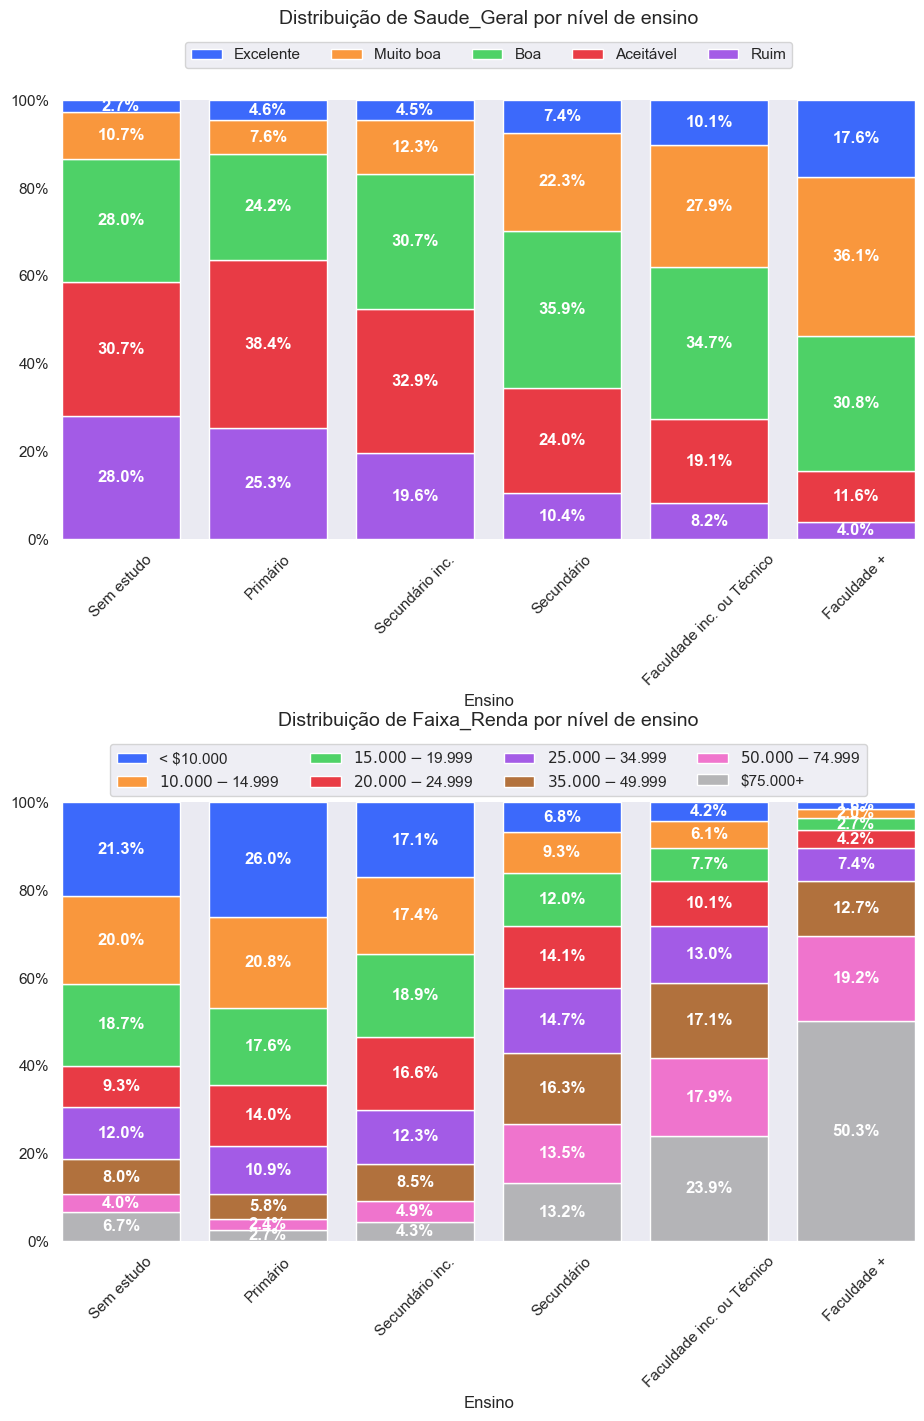

In [16]:
# Define as colunas categóricas que serão analisadas
colunas_analise = ["Saude_Geral", "Faixa_Renda"]

# Cria uma figura com 2 subgráficos organizados em uma única coluna
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Loop para gerar um gráfico para cada variável categórica em colunas_analise
for ax, coluna in zip(axs.flatten(), colunas_analise):
    # Cria um histograma empilhado da variável "Ensino", segmentado por cada coluna analisada
    h = sns.histplot(
        x="Ensino",  # Eixo X representa o nível de ensino
        hue=coluna,  # A cor representa as categorias da variável em análise
        data=df_diabetes_tratado,  # DataFrame de origem dos dados
        multiple='fill',  # Normaliza para que a soma das barras seja sempre 100%
        ax=ax,  # Define o eixo correspondente no subplot
        stat='percent',  # Exibe os valores em percentuais
        shrink=0.8  # Ajusta a largura das barras para melhor visualização
    )

    # Rotaciona os rótulos do eixo X para melhor legibilidade
    h.tick_params(axis='x', labelrotation=45)

    # Formata o eixo Y para exibir os valores em porcentagem (0 a 100%)
    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')  # Remove o rótulo do eixo Y para uma aparência mais limpa

    # Remove as bordas do gráfico para um design mais minimalista
    h.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    # Adiciona rótulos dentro das barras do gráfico
    for bar in h.containers:
        h.bar_label(
            bar, 
            label_type='center',  # Posiciona os rótulos no centro das barras
            labels=[f'{b.get_height():.1%}' for b in bar],  # Converte valores para formato percentual
            color='white',  # Define a cor do texto para melhor contraste
            weight='bold'  # Deixa os rótulos em negrito
        )

    # Obtém a legenda gerada automaticamente pelo seaborn
    legend = h.get_legend()

    # Captura os rótulos das categorias na legenda
    labels = [text.get_text() for text in legend.get_texts()]

    # Obtém o número de categorias da variável analisada
    numero_itens = len(df_diabetes_tratado[coluna].cat.categories)

    # Ajusta a posição e o número de colunas da legenda com base no número de categorias
    ax.legend(
        handles=legend.legend_handles,
        labels=labels,
        loc="upper center",
        ncols=numero_itens if numero_itens <= 6 else min(4, numero_itens),  # Máximo de 4 colunas se houver muitas categorias
        bbox_to_anchor=(0.5, 1.15),  # Posiciona a legenda acima do gráfico
    )

    # Define o título do gráfico para indicar a variável em análise
    ax.set_title(f"Distribuição de {coluna} por nível de ensino", fontsize=14, pad=55)

# Ajusta o espaçamento entre os subgráficos para melhor visualização
plt.subplots_adjust(wspace=0.1, hspace=0.6, top=0.925)

# Alterando o tamanho antes de salvar
fig.set_size_inches(11, 14)  # Define um tamanho menor para salvar a imagem

# Salvando a imagem com tamanho reduzido
fig.savefig(PASTA_IMAGENS / "diabetes_visualizacao_Ensino.png", dpi=100)

# Exibe os gráficos gerados
plt.show()


In [17]:
# Dicionário para armazenar as tabelas de contingência
tabelas_contingencia = {}

# Itera sobre todas as colunas categóricas do DataFrame, exceto a coluna alvo
for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo: 
        # Cria uma tabela de contingência entre a variável alvo e a variável categórica atual
        tabelas_contingencia[coluna] = pd.crosstab(df_diabetes_tratado[coluna_alvo], df_diabetes_tratado[coluna])


In [18]:
tabelas_contingencia["Pressao_Alta"]

Pressao_Alta,Não,Sim
Diabetes,,
Não,22118,13228
Sim,8742,26604


In [19]:
# Itera sobre todas as colunas categóricas do DataFrame, exceto a coluna alvo
for coluna in df_diabetes_tratado.select_dtypes("category").columns:
    if coluna != coluna_alvo:  
        # Exibe a tabela de contingência normalizada para cada variável categórica
        display(
            pd.crosstab(
                df_diabetes_tratado[coluna_alvo],  # Variável alvo nas linhas
                df_diabetes_tratado[coluna],  # Variável categórica nas colunas
                margins=True,  # Adiciona uma linha e coluna de totais
                normalize="index"  # Normaliza os valores por linha (percentual de cada categoria)
            ).style.format("{:.2%}")  # Formata os valores como porcentagem
        )


Pressao_Alta,Não,Sim
Diabetes,,
Não,62.58%,37.42%
Sim,24.73%,75.27%
All,43.65%,56.35%


Colesterol_Alto,Não,Sim
Diabetes,,
Não,61.87%,38.13%
Sim,32.99%,67.01%
All,47.43%,52.57%


Colesterol_Exame,Não,Sim
Diabetes,,
Não,4.27%,95.73%
Sim,0.68%,99.32%
All,2.47%,97.53%


Fumante,Não,Sim
Diabetes,,
Não,56.77%,43.23%
Sim,48.18%,51.82%
All,52.47%,47.53%


AVC,Não,Sim
Diabetes,,
Não,96.81%,3.19%
Sim,90.75%,9.25%
All,93.78%,6.22%


Problema_Cardiaco,Não,Sim
Diabetes,,
Não,92.73%,7.27%
Sim,77.71%,22.29%
All,85.22%,14.78%


Atividade_Fisica,Não,Sim
Diabetes,,
Não,22.45%,77.55%
Sim,36.95%,63.05%
All,29.70%,70.30%


Come_Frutas,Não,Sim
Diabetes,,
Não,36.19%,63.81%
Sim,41.46%,58.54%
All,38.82%,61.18%


Come_Legumes,Não,Sim
Diabetes,,
Não,17.89%,82.11%
Sim,24.36%,75.64%
All,21.12%,78.88%


Consumo_Bebida_Alcoolica,Não,Sim
Diabetes,,
Não,93.81%,6.19%
Sim,97.65%,2.35%
All,95.73%,4.27%


Plano_Saude,Não,Sim
Diabetes,,
Não,4.99%,95.01%
Sim,4.02%,95.98%
All,4.50%,95.50%


Sem_Dinheiro_Consultas,Não,Sim
Diabetes,,
Não,91.80%,8.20%
Sim,89.41%,10.59%
All,90.61%,9.39%


Saude_Geral,Excelente,Muito boa,Boa,Aceitável,Ruim
Diabetes,,,,,
Não,20.21%,38.17%,28.21%,9.94%,3.48%
Sim,3.23%,18.05%,38.07%,27.70%,12.95%
All,11.72%,28.11%,33.14%,18.82%,8.22%


Dificuldade_Andar,Não,Sim
Diabetes,,
Não,86.58%,13.42%
Sim,62.88%,37.12%
All,74.73%,25.27%


Genero,Feminino,Masculino
Diabetes,,
Não,56.51%,43.49%
Sim,52.09%,47.91%
All,54.30%,45.70%


Faixa_Idade,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Diabetes,,,,,,,,,,,,,
Não,2.55%,3.55%,4.91%,6.13%,6.99%,8.22%,10.71%,12.28%,12.39%,12.16%,8.21%,5.63%,6.27%
Sim,0.22%,0.40%,0.89%,1.77%,2.97%,4.93%,8.74%,12.06%,16.22%,18.55%,14.54%,9.63%,9.08%
All,1.38%,1.97%,2.90%,3.95%,4.98%,6.58%,9.72%,12.17%,14.30%,15.36%,11.38%,7.63%,7.68%


Ensino,Sem estudo,Primário,Secundário inc.,Secundário,Faculdade inc. ou Técnico,Faculdade +
Diabetes,,,,,,
Não,0.08%,1.31%,3.26%,23.78%,27.38%,44.19%
Sim,0.13%,3.35%,6.50%,31.31%,29.29%,29.42%
All,0.11%,2.33%,4.88%,27.55%,28.33%,36.81%


Faixa_Renda,< $10.000,$10.000-$14.999,$15.000-$19.999,$20.000-$24.999,$25.000-$34.999,$35.000-$49.999,$50.000-$74.999,$75.000+
Diabetes,,,,,,,,
Não,3.47%,3.99%,5.63%,7.37%,9.92%,14.13%,17.43%,38.06%
Sim,6.74%,8.73%,10.09%,11.47%,12.74%,14.97%,14.90%,20.36%
All,5.11%,6.36%,7.86%,9.42%,11.33%,14.55%,16.16%,29.21%


## Insights 

### **1. Fatores de Saúde e Estilo de Vida**  

#### **1.1 Pressão Alta vs. Diabetes**  
**75.27% das pessoas com diabetes têm pressão alta**, contra 37.42% dos não diabéticos.  
**Alto risco**: Pressão alta é uma das condições mais fortemente associadas ao diabetes.

#### **1.2 Colesterol Alto vs. Diabetes**  
**67.01% das pessoas com diabetes têm colesterol alto**, em comparação com 38.13% dos não diabéticos.  
**Alerta**: Diabetes está relacionado a disfunções metabólicas que também afetam os níveis de colesterol.

#### **1.3 Exame de Colesterol vs. Diabetes**  
**99.32% das pessoas com diabetes fazem exames de colesterol**, contra 95.73% dos não diabéticos.  
**Indica acompanhamento médico mais frequente**, essencial para controlar os riscos cardiovasculares do diabetes.

#### **1.4 AVC vs. Diabetes**  
**9.25% das pessoas com diabetes tiveram AVC**, enquanto apenas 3.19% dos não diabéticos passaram por isso.  
**Diabetes aumenta o risco de AVC**, possivelmente por conta da hipertensão e problemas circulatórios.

#### **1.5 Problema Cardíaco vs. Diabetes**  
**22.29% das pessoas com diabetes têm doenças cardíacas**, contra apenas 7.27% dos não diabéticos.  
**Confirma a forte relação entre diabetes e problemas cardíacos**

#### **1.6 Atividade Física vs. Diabetes**  
**63.05% das pessoas com diabetes praticam atividades físicas**, contra 77.55% dos não diabéticos.  
**A falta de atividade física está correlacionada ao diabetes**

#### **1.7 Alimentação (Frutas e Legumes) vs. Diabetes**  
**Menos diabéticos consomem frutas (58.54%) e legumes (75.64%) do que os não diabéticos (63.81% e 82.11%)**.  
**Sugere que alimentação saudável pode ser um fator de proteção contra diabetes**.

### **2. Condições Socioeconômicas e Saúde**  

#### **2.1 Plano de Saúde vs. Diabetes**  
**95.98% das pessoas com diabetes possuem plano de saúde**, semelhante aos não diabéticos (95.01%).  
**Acesso ao plano de saúde não parece influenciar significativamente o risco de diabetes**, mas pode impactar o acompanhamento da doença.

### **3. Qualidade de Vida e Bem-Estar**  

#### **3.1 Autoavaliação da Saúde vs. Diabetes**  
-**Diabéticos se avaliam com saúde pior** do que não diabéticos:  
- **"Ruim"**: 12.95% dos diabéticos vs. 3.48% dos não diabéticos.  
- **"Excelente"**: Apenas 3.23% dos diabéticos vs. 20.21% dos não diabéticos.  
- **Sugere que o diabetes afeta negativamente a percepção da saúde pessoal**.

#### **3.2 Dificuldade de Locomoção vs. Diabetes**  
**37.12% das pessoas com diabetes têm dificuldades para andar**, contra 13.42% dos não diabéticos.  
**Indica impacto do diabetes na mobilidade, pessoas sedentárias são mais propensas a serem diabéticas**

### **4. Demografia: Idade, Gênero, Educação e Renda**  

#### **4.1 Idade vs. Diabetes**  
**O diabetes se torna mais comum com a idade**:  
- **A maior incidência ocorre entre 60-79 anos**, com pico na faixa **65-69 anos (18.55%)**.  
**Reflete o fator etário como um grande risco para o diabetes**.

#### **4.2 Gênero vs. Diabetes**  
**Percentual de diabetes é levemente maior entre homens (47.91%) do que entre mulheres (52.09%)**.  
**Diferença pequena, sugerindo que gênero não é um fator determinante**.

#### **4.3 Educação vs. Diabetes**  
**Pessoas com menor escolaridade têm mais diabetes**:  
- **Sem estudo: 0.13% dos diabéticos vs. 0.08% dos não diabéticos**.  
- **Ensino primário: 3.35% dos diabéticos vs. 1.31% dos não diabéticos**.  
- **Ensino superior: 29.42% dos diabéticos vs. 44.19% dos não diabéticos**.  
**Maior nível de escolaridade pode estar associado a um melhor acesso à informação sobre saúde e a hábitos mais saudáveis. Além disso, a escolaridade está relacionada a uma renda maior, o que proporciona um melhor acesso aos serviços de saúde.**.

#### **4.4 Renda vs. Diabetes**  
**Quanto menor a renda, maior a incidência de diabetes**:  
- **6.74% dos diabéticos ganham menos de $10.000**, contra 3.47% dos não diabéticos.  
- **Apenas 20.36% dos diabéticos têm renda superior a $75.000, enquanto entre os não diabéticos esse valor é 38.06%**.  
**Pessoas de baixa renda podem ter menos acesso a alimentação saudável e cuidados preventivos de saúde**.



In [20]:
# Converte colunas categóricas para códigos numéricos e calcula a matriz de correlação de Spearman

resultados_correlacao = (
    df_diabetes_tratado
    .select_dtypes("category")  # Seleciona apenas colunas categóricas
    .apply(lambda coluna: coluna.cat.codes)  # Converte categorias em códigos numéricos
    .corr(method="spearman", numeric_only=False)  # Calcula a correlação de Spearman
)

# Exibe a matriz de correlação
resultados_correlacao


,Diabetes,Pressao_Alta,Colesterol_Alto,Colesterol_Exame,Fumante,AVC,Problema_Cardiaco,Atividade_Fisica,Come_Frutas,Come_Legumes,Consumo_Bebida_Alcoolica,Plano_Saude,Sem_Dinheiro_Consultas,Saude_Geral,Dificuldade_Andar,Genero,Faixa_Idade,Ensino,Faixa_Renda
Diabetes,1.000000,0.381516,0.289213,0.115382,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.414259,0.272646,0.044413,0.261620,-0.169926,-0.232529
Pressao_Alta,0.381516,1.000000,0.316515,0.103283,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.324038,0.234784,0.040819,0.322180,-0.143543,-0.196896
Colesterol_Alto,0.289213,0.316515,1.000000,0.085981,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.239138,0.162043,0.017324,0.217974,-0.083177,-0.110289
Colesterol_Exame,0.115382,0.103283,0.085981,1.000000,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.060257,0.044430,-0.007991,0.099208,-0.007693,0.007271
Fumante,0.085999,0.087438,0.093398,-0.004331,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.149960,0.119789,0.112125,0.098822,-0.152918,-0.112241
AVC,0.125427,0.129060,0.099786,0.022529,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.182517,0.192266,0.003822,0.123544,-0.071889,-0.134487
Problema_Cardiaco,0.211523,0.210750,0.181187,0.043497,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.268815,0.232611,0.098161,0.225231,-0.093727,-0.148924
Atividade_Fisica,-0.158666,-0.136102,-0.090453,-0.008249,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.270967,-0.276868,0.051753,-0.092685,0.193831,0.202370
Come_Frutas,-0.054077,-0.040852,-0.047384,0.017384,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.099559,-0.050784,-0.088723,0.067778,0.104653,0.076732
Come_Legumes,-0.079293,-0.066624,-0.042836,0.000349,-0.029926,-0.047601,-0.036315,0.149322,0.238605,1.000000,0.022090,0.029152,-0.037146,-0.117258,-0.084072,-0.052604,-0.017208,0.153539,0.155816


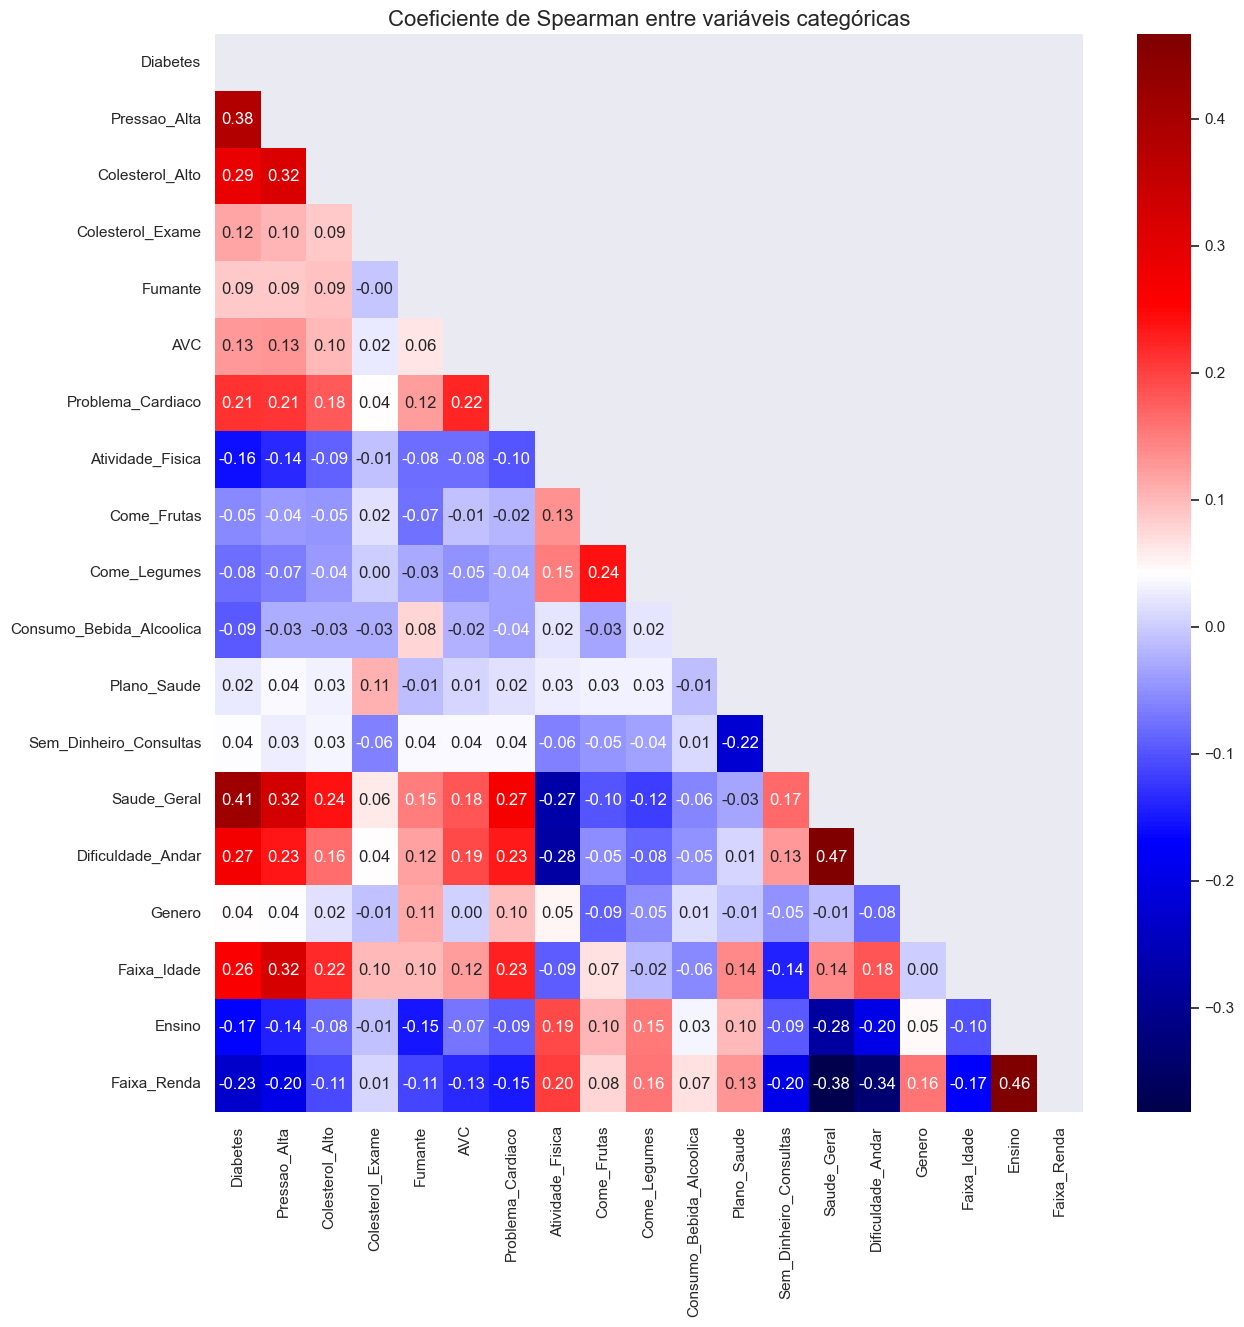

In [21]:
# Cria uma máscara para ocultar a metade superior da matriz de correlação
matriz = np.triu(resultados_correlacao)

# Configura o tamanho da figura do gráfico
fig, ax = plt.subplots(figsize=(14, 14))

# Gera o heatmap da matriz de correlação
sns.heatmap(
    resultados_correlacao,  # Matriz de correlação calculada anteriormente
    mask=matriz,  # Aplica a máscara para ocultar valores redundantes
    annot=True,  # Exibe os valores numéricos dentro do heatmap
    fmt=".2f",  # Formata os valores com duas casas decimais
    ax=ax,  # Define o eixo do gráfico
    cmap="seismic"  # Define o mapa de cores (tons de azul para negativo e vermelho para positivo)
)

# Adiciona um título ao gráfico
plt.title("Coeficiente de Spearman entre variáveis categóricas", fontsize=16)

# Alterando o tamanho antes de salvar
#fig.set_size_inches(14, 11)  # Define um tamanho menor para salvar a imagem

# Salvando a imagem com tamanho reduzido
#fig.savefig(PASTA_IMAGENS / "diabetes_visualizacao_correlacoes.png", dpi=100)

# Exibe o gráfico
plt.show()


### **1. Correlações e seus Significados**
- **Saúde Geral vs. Diabetes (0.414), Pressão Alta (0.324), Problema Cardíaco (0.268), Dificuldade de Andar (0.466)**
  - Pessoas com pior saúde geral tendem a ter essas condições crônicas, indicando que esses fatores estão interligados.
  
- **Dificuldade de Andar vs. Saúde Geral (0.466), Diabetes (0.272), Pressão Alta (0.234), Problema Cardíaco (0.232)**
  - Confirma que doenças crônicas impactam a mobilidade.

- **Ensino vs. Faixa Renda (0.463)**
  - Quanto maior o nível de ensino, maior a renda, reforçando o impacto da educação na condição financeira.

- **Faixa Renda vs. Saúde Geral (-0.382), Dificuldade de Andar (-0.336), Diabetes (-0.232)**
  - Pessoas com menor renda tendem a ter pior saúde, provavelmente por terem acesso limitado a serviços de saúde, alimentação de qualidade, locais para praticarem atividades físicas.
 
### **2. Hábitos e Doenças**
- **Atividade Física vs. Saúde Geral (-0.270), Dificuldade de Andar (-0.276)**
  - Pessoas mais ativas tendem a relatar melhor saúde e menos dificuldades de locomoção.

- **Atividade Física vs. Diabetes (-0.158), Pressão Alta (-0.136)**
  - Atividade física parece reduzir a probabilidade dessas condições, o que está de acordo com o esperado.

- **Fumar vs. Problema Cardíaco (0.124), Diabetes (0.085), Pressão Alta (0.087)**
  - Reforça que o tabagismo pode estar associado a problemas cardiovasculares e metabólicos.
 
### **3. Acesso à Saúde e Condições Financeiras**
- **Sem Dinheiro para Consultas vs. Plano de Saúde (-0.221), Faixa de Renda (-0.195), Saúde Geral (0.166)**
  - Pessoas sem plano de saúde e com menor renda relatam pior estado de saúde, sugerindo barreiras no acesso à saúde.
 

## **Conclusões da análise dos dados**  

**Fatores de Maior Risco para Diabetes:**  
1. **Hipertensão (75.27%)** e **colesterol alto (67.01%)** → Reforçam a relação do diabetes com doenças cardiovasculares.  
2. **Idade avançada** → Maior incidência a partir dos 50 anos.  
3. **Sedentarismo** → Percentual menor de atividade física entre diabéticos (63.05%).  
4. **Baixa escolaridade e renda** → Pode indicar falta de acesso a informação e cuidados médicos.  
5. **Saúde Geral Ruim** → Quase 13% dos diabéticos avaliam sua saúde como "ruim".

## **Correlações Importantes** 

1. **A correlação entre doenças crônicas e saúde geral reforça a necessidade de prevenção.**
2. **Baixa renda está associada a pior saúde e menos acesso a saúde, consultas médicas e alimentação de qualidade.**
3. **Atividade física pode atuar como um fator de proteção para várias condições.**
4. **Fumantes apresentam mais problemas cardíacos e metabólicos, o que confirma os riscos conhecidos.**